# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [9]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2024-11-10 19:17:29--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2024-11-10 19:17:29--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.1’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [10]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [12]:
import pandas as pd

df = pd.read_csv('Gender_bias_spanish.csv')

print("Primeras filas del dataset:")
print(df.head())

print("\nColumnas en el dataset:")
print(df.columns)

print("\nValores nulos en cada columna:")
print(df.isnull().sum())

print("\nDistribución de las etiquetas:")
print(df['Label'].value_counts())


Primeras filas del dataset:
                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased
4  como siempre mi tortilla triunfa mas que otros...  non-biased

Columnas en el dataset:
Index(['Contents', 'Label'], dtype='object')

Valores nulos en cada columna:
Contents    0
Label       0
dtype: int64

Distribución de las etiquetas:
Label
non-biased    1596
biased         318
Name: count, dtype: int64


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [14]:
print("Resumen del conjunto de datos:")
print(df.info())  # Información general (tipos de datos, no nulos, etc.)

print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

print("\nCantidad de tweets por etiqueta:")
print(df['Label'].value_counts())


Resumen del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB
None

Estadísticas descriptivas del dataset:
                                                 Contents       Label
count                                                1914        1914
unique                                               1914           2
top     @chumeltorres ya cabrón! sin tí se reciben las...  non-biased
freq                                                    1        1596

Cantidad de tweets por etiqueta:
Label
non-biased    1596
biased         318
Name: count, dtype: int64


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [17]:
total_tweets = len(df)

tweets_biased = df['Label'].value_counts().get('biased', 0)  # Cuenta los tweets etiquetados como 'biased'
tweets_non_biased = df['Label'].value_counts().get('non-biased', 0)  # Cuenta los tweets etiquetados como 'non-biased'

proporcion_biased = tweets_biased / total_tweets
proporcion_non_biased = tweets_non_biased / total_tweets

print(f"\nProporción de tweets 'biased': {proporcion_biased:.2f}")
print(f"Proporción de tweets 'non-biased': {proporcion_non_biased:.2f}")


Proporción de tweets 'biased': 0.17
Proporción de tweets 'non-biased': 0.83


Representación de la realidad: Una proporción desequilibrada podría indicar un sesgo en la muestra de datos, lo que no representaría la realidad con precisión.

Si la proporción está desequilibrada, los modelos de aprendizaje automático podrían estar sesgados hacia la clase mayoritaria. Es necesario realizar técnicas de balanceo de datos para obtener resultados más justo

Interpretación de resultados:La proporción ayuda a contextualizar los hallazgos del análisis. Un resultado podría ser significativo para la clase minoritaria pero no para la mayoritaria.

Comparación entre diferentes conjuntos de datos:Permite comparar los resultados con otros conjuntos de datos y determinar si las diferencias son significativas.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [18]:
## Cree una funcion limpiar texto

In [24]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def limpiar_texto(texto):
    texto = texto.lower()

    texto = re.sub(r'@[\w]+', '', texto)

    texto = re.sub(r'http\S+', '', texto)

    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)

    stop_words = set(stopwords.words('spanish'))
    texto = ' '.join([palabra for palabra in texto.split() if palabra not in stop_words])

    return texto

df['texto_limpio'] = df['Contents'].apply(limpiar_texto)

print(df[['Contents', 'texto_limpio']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                        texto_limpio  
0  cabrón tí reciben noticias colchoncito puro ch...  
1  alguien tan amable ir hacerme compra mañana ba...  
2          hahaha si rico nadamas falta presentación  
3  ves programa favorito sólo encuentro temporada...  
4          siempre tortilla triunfa mas platos playa  


In [20]:


# Aplicar la limpieza de texto


In [25]:
df['texto_limpio'] = df['Contents'].apply(limpiar_texto)

print(df[['Contents', 'texto_limpio']].head())


                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                        texto_limpio  
0  cabrón tí reciben noticias colchoncito puro ch...  
1  alguien tan amable ir hacerme compra mañana ba...  
2          hahaha si rico nadamas falta presentación  
3  ves programa favorito sólo encuentro temporada...  
4          siempre tortilla triunfa mas platos playa  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [26]:


# Contar palabras


# Visualización de frecuencia de palabras



Palabras más comunes en los tweets 'biased':
[('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]

Palabras más comunes en los tweets 'non-biased':
[('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


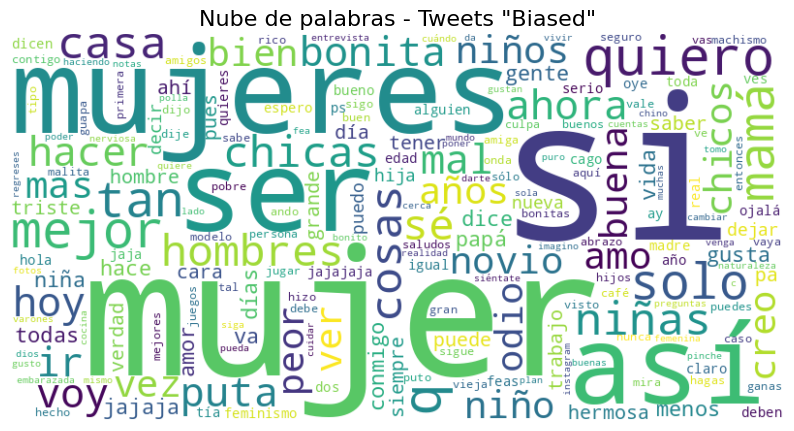

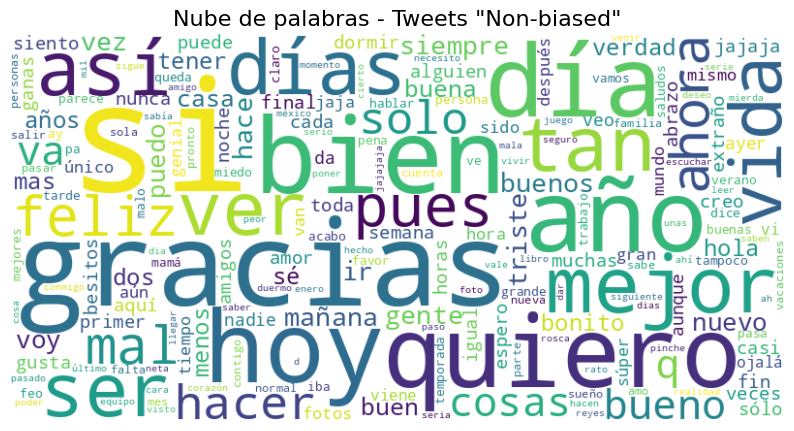

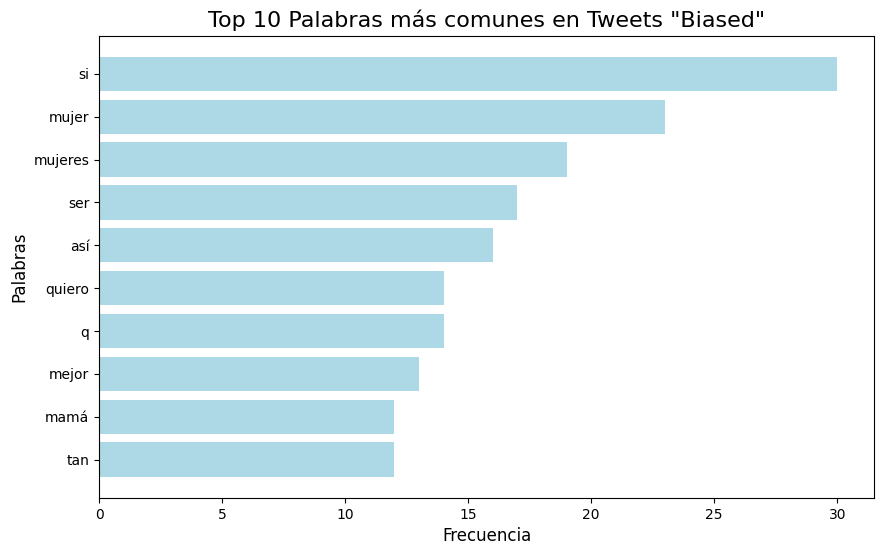

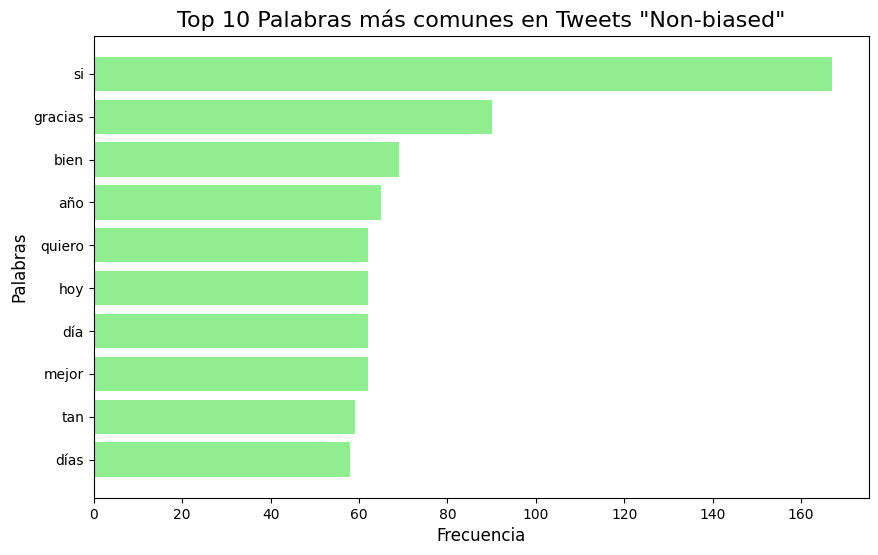

In [29]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tweets_biased = df[df['Label'] == 'biased']['texto_limpio']
tweets_non_biased = df[df['Label'] == 'non-biased']['texto_limpio']

words_biased = ' '.join(tweets_biased).split()
words_non_biased = ' '.join(tweets_non_biased).split()

word_count_biased = Counter(words_biased)
word_count_non_biased = Counter(words_non_biased)

print("Palabras más comunes en los tweets 'biased':")
print(word_count_biased.most_common(10))

print("\nPalabras más comunes en los tweets 'non-biased':")
print(word_count_non_biased.most_common(10))

plt.figure(figsize=(10, 8))
wordcloud_biased = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_biased)
plt.title('Nube de palabras - Tweets "Biased"', fontsize=16)
plt.imshow(wordcloud_biased, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 8))
wordcloud_non_biased = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_non_biased)
plt.title('Nube de palabras - Tweets "Non-biased"', fontsize=16)
plt.imshow(wordcloud_non_biased, interpolation='bilinear')
plt.axis('off')
plt.show()

most_common_biased = word_count_biased.most_common(10)
words_biased, counts_biased = zip(*most_common_biased)

plt.figure(figsize=(10, 6))
plt.barh(words_biased, counts_biased, color='lightblue')
plt.title('Top 10 Palabras más comunes en Tweets "Biased"', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabras', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

most_common_non_biased = word_count_non_biased.most_common(10)
words_non_biased, counts_non_biased = zip(*most_common_non_biased)

plt.figure(figsize=(10, 6))
plt.barh(words_non_biased, counts_non_biased, color='lightgreen')
plt.title('Top 10 Palabras más comunes en Tweets "Non-biased"', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabras', fontsize=12)
plt.gca().invert_yaxis()
plt.show()



**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

Palabras más comunes en los tweets 'biased':
[('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]

Palabras más comunes en los tweets 'non-biased':
[('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


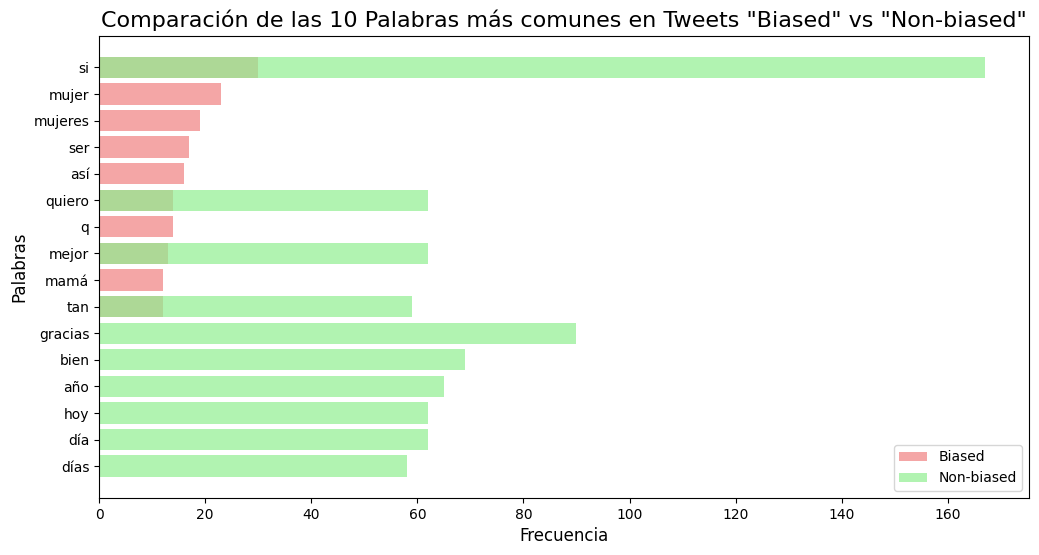

In [30]:
print("Palabras más comunes en los tweets 'biased':")
print(word_count_biased.most_common(10))

print("\nPalabras más comunes en los tweets 'non-biased':")
print(word_count_non_biased.most_common(10))

biased_words, biased_counts = zip(*word_count_biased.most_common(10))

non_biased_words, non_biased_counts = zip(*word_count_non_biased.most_common(10))

plt.figure(figsize=(12, 6))

plt.barh(biased_words, biased_counts, color='lightcoral', alpha=0.7, label='Biased', align='center')
plt.barh(non_biased_words, non_biased_counts, color='lightgreen', alpha=0.7, label='Non-biased', align='center')

plt.title('Comparación de las 10 Palabras más comunes en Tweets "Biased" vs "Non-biased"', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabras', fontsize=12)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


 Cómo usar la información para entender mejor las opiniones sesgadas:
1. Monitoreo de la reputación: Identificar temas o palabras clave que generen controversia
o polarización. Detectar patrones en los tweets "biased", como menciones a competidores,
productos o temas específicos.
2. Análisis de campañas de marketing: Evaluar la reacción del público a las campañas publicitarias
y detectar sesgos potenciales.  Analizar si se están utilizando palabras clave que generan
respuestas sesgadas.
3. Mejora del servicio al cliente: Identificar las quejas o comentarios de clientes con
un sesgo negativo para entender mejor sus necesidades y abordar problemas de manera más eficaz.
Detectar si las quejas están relacionadas con un sesgo específico y su impacto.
4.  Gestión de crisis:  Monitorear las redes sociales para detectar rápidamente opiniones
sesgadas que puedan indicar una crisis de reputación.  Reaccionar con rapidez y estrategias
para mitigar el impacto de la crisis.
5. Segmentación de clientes: Agrupar a los clientes en función de la polaridad y el sesgo
expresado en sus tweets.  Desarrollar campañas de marketing personalizadas para cada grupo.
6.  Investigación de mercados: Entender los prejuicios y estereotipos que pueden afectar
la percepción de los productos o servicios.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [31]:
from textblob import TextBlob

def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df[['polaridad', 'subjetividad']] = df['texto_limpio'].apply(lambda x: pd.Series(obtener_sentimiento(x)))

print(df[['Contents', 'Label', 'polaridad', 'subjetividad']].head())


                                            Contents       Label  polaridad  \
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased        0.0   
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased        0.0   
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased        0.2   
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased        0.0   
4  como siempre mi tortilla triunfa mas que otros...  non-biased        0.0   

   subjetividad  
0           0.0  
1           0.0  
2           0.4  
3           0.0  
4           0.0  


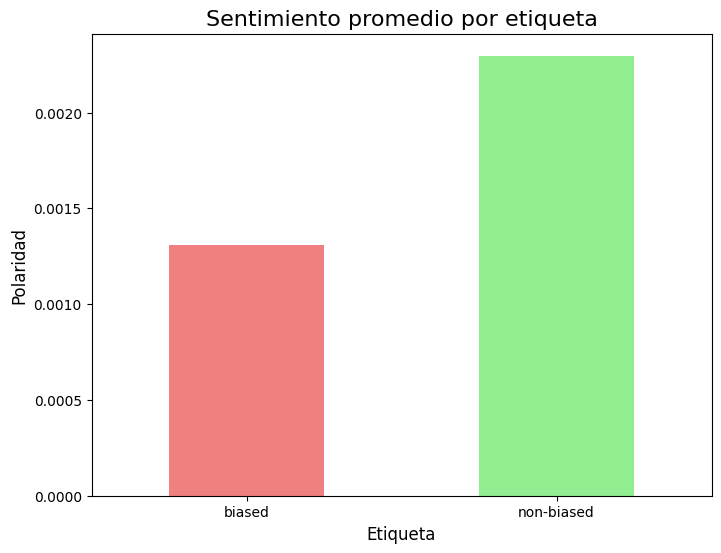

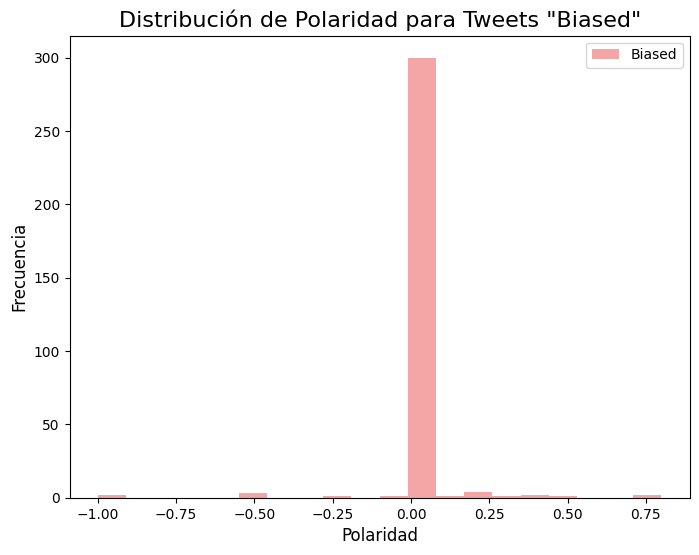

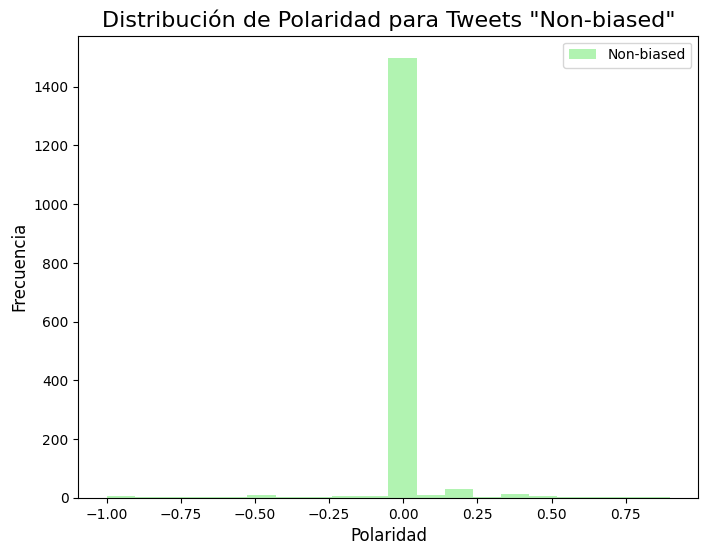

Sentimiento promedio de tweets 'biased': 0.001
Sentimiento promedio de tweets 'non-biased': 0.002


In [33]:
sentiment_by_label = df.groupby('Label')['polaridad'].mean()

plt.figure(figsize=(8, 6))
sentiment_by_label.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Sentimiento promedio por etiqueta', fontsize=16)
plt.xlabel('Etiqueta', fontsize=12)
plt.ylabel('Polaridad', fontsize=12)
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df[df['Label'] == 'biased']['polaridad'], bins=20, color='lightcoral', alpha=0.7, label='Biased')
plt.title('Distribución de Polaridad para Tweets "Biased"', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(df[df['Label'] == 'non-biased']['polaridad'], bins=20, color='lightgreen', alpha=0.7, label='Non-biased')
plt.title('Distribución de Polaridad para Tweets "Non-biased"', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

print(f"Sentimiento promedio de tweets 'biased': {sentiment_by_label['biased']:.3f}")
print(f"Sentimiento promedio de tweets 'non-biased': {sentiment_by_label['non-biased']:.3f}")

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

Si existe una diferencia significativa entre los sentimientos promedio de los tweets 'biased' y los 'non-biased', esto indica que los tweets etiquetados como sesgados tienden a expresar emociones diferentes.

Esta diferencia podría estar relacionada con la naturaleza de los tweets sesgados:
Los tweets sesgados podrían ser más propensos a expresar emociones negativas o positivas extremas.
Alternativamente, puede haber una tendencia a expresar emociones subjetivas basadas en una creencia predeterminada en lugar de una evaluación objetiva de la información.
La diferencia en los sentimientos promedio entre tweets sesgados y no sesgados puede indicar la existencia de sesgos de confirmación, es decir, la tendencia a favorecer la información que confirma las creencias preexistentes y rechazar aquella que las contradice.


Aplicación del análisis de sentimientos para entender la percepción del público sobre un tema específico:
1. Recopilación de datos: Obtener tweets relacionados con el tema.
2. Limpieza de datos: Aplicar preprocesamiento al texto, tal como se ha realizado en este taller.
3. Análisis de sentimiento: Calcular la polaridad y subjetividad de cada tweet.
4. Análisis de tendencias: Observar las tendencias de sentimiento a lo largo del tiempo, buscar patrones y correlaciones con eventos específicos.
5. Segmentación de la audiencia: Identificar grupos con diferentes perspectivas basadas en el sentimiento expresado.
6. Visualización de datos: Crear gráficos y representaciones visuales para visualizar la polaridad y la subjetividad.


Ejemplo: Si estamos evaluando la percepción del público sobre una nueva política gubernamental, podríamos analizar los tweets relacionados con ella y determinar si el sentimiento predominante es positivo, negativo o neutral.
Esto nos ayudaría a comprender cómo la opinión pública está reaccionando a la política y tomar decisiones informadas basadas en esos datos.


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [34]:
## Cree una funcion para geenrar nube de palabras

In [35]:
from textblob import TextBlob

def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df[['polaridad', 'subjetividad']] = df['texto_limpio'].apply(lambda x: pd.Series(obtener_sentimiento(x)))

print(df[['Contents', 'Label', 'polaridad', 'subjetividad']].head())


                                            Contents       Label  polaridad  \
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased        0.0   
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased        0.0   
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased        0.2   
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased        0.0   
4  como siempre mi tortilla triunfa mas que otros...  non-biased        0.0   

   subjetividad  
0           0.0  
1           0.0  
2           0.4  
3           0.0  
4           0.0  


In [37]:


# Generar nube de palabras para cada conjunto



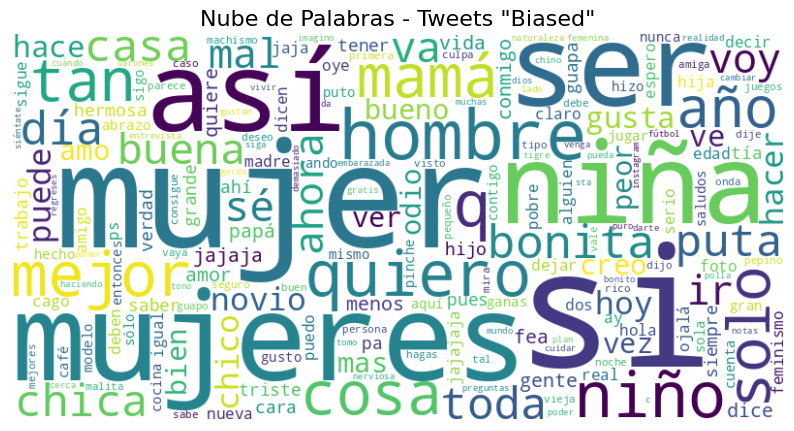

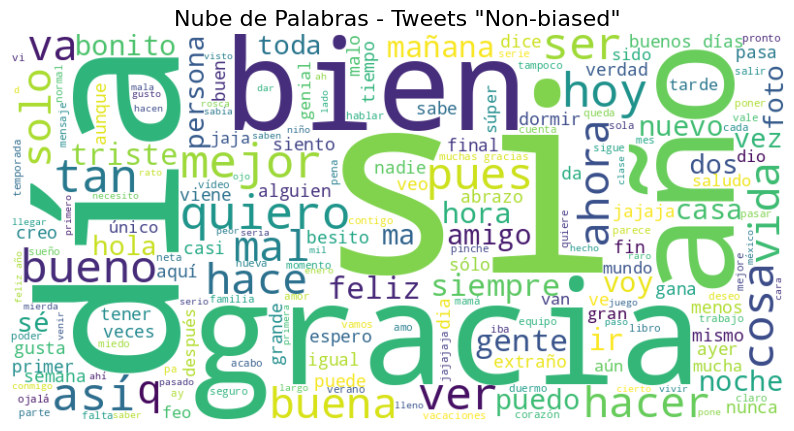

In [38]:
def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo, fontsize=16)
    plt.show()

texto_biased = ' '.join(df[df['Label'] == 'biased']['texto_limpio'])
generar_nube_palabras(texto_biased, 'Nube de Palabras - Tweets "Biased"')

texto_non_biased = ' '.join(df[df['Label'] == 'non-biased']['texto_limpio'])
generar_nube_palabras(texto_non_biased, 'Nube de Palabras - Tweets "Non-biased"')

In [39]:
# NO biased nube de palabras


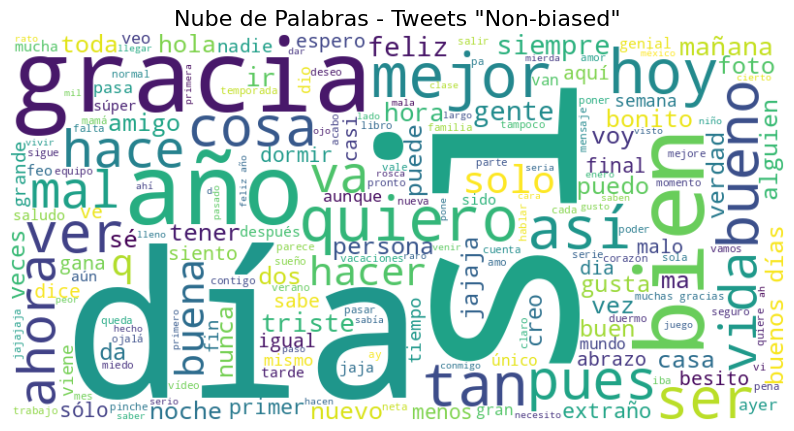

In [40]:
def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo, fontsize=16)
    plt.show()

texto_non_biased = ' '.join(df[df['Label'] == 'non-biased']['texto_limpio'])
generar_nube_palabras(texto_non_biased, 'Nube de Palabras - Tweets "Non-biased"')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?

1. Identificar y abordar sesgos negativos:
- El análisis revela palabras y temas que generan sesgos negativos hacia la marca.
- La empresa puede usar esta información para identificar las causas de estos sesgos.
- Se pueden desarrollar estrategias para contrarrestar estos sesgos, por ejemplo,
lanzando campañas que promuevan la inclusión o que aborden las preocupaciones de los clientes.
- Si los sesgos se deben a información errónea, se pueden crear materiales informativos para corregirla.

2. Optimizar el mensaje para diferentes grupos de clientes:
- El análisis de sentimientos permite segmentar al público según su percepción de la marca.
- Se pueden adaptar los mensajes de marketing para resonar mejor con cada grupo, considerando sus emociones y preocupaciones.
- Por ejemplo, a los clientes con una opinión negativa se les pueden ofrecer soluciones concretas a sus problemas, mientras que a los clientes positivos se les pueden ofrecer incentivos para que compartan su experiencia.

3. Monitorear la reputación de la marca:
- Realizando un seguimiento regular del análisis de texto, la empresa puede detectar cambios en la percepción de su marca.
- Esto permitirá una respuesta rápida a las crisis de reputación o tendencias negativas.
- Se pueden lanzar campañas de corrección o de mejora de imagen en tiempo real para controlar la narrativa.

4. Mejorar el servicio al cliente:
- El análisis de texto puede ayudar a identificar las quejas de los clientes y los temas recurrentes.
-  La empresa puede utilizar esta información para mejorar su servicio al cliente y reducir la cantidad de comentarios negativos.
-  Se pueden automatizar respuestas o protocolos de atención al cliente para abordar los comentarios negativos de forma más efectiva.

5. Desarrollo de productos y servicios:
- Las palabras clave y temas recurrentes en el análisis pueden señalar necesidades o preferencias de los clientes.
- Se puede usar esta información para desarrollar productos o servicios que satisfagan esas necesidades.


2. Ajustar el tono de la campaña para ser más neutral y objetivo,  abordar directamente las preocupaciones que generan el sesgo, diversificar el público objetivo de la campaña para obtener perspectivas más amplias y  monitorear de cerca las reacciones para identificar y corregir cualquier nuevo sesgo.


3. Análisis de tendencias a lo largo del tiempo:

1.  Análisis de series temporales: Si los datos incluyen información temporal (fecha y hora de los tweets), se pueden analizar las tendencias de sentimiento, frecuencia de palabras clave y polaridad a lo largo del tiempo. Esto permite identificar cambios en la percepción del público y eventos clave que influyen en la opinión.


2.  Análisis de la evolución de las palabras clave:  Observar cómo cambia la frecuencia de ciertas palabras clave con el paso del tiempo.  Esto puede indicar cambios en los temas de conversación, en los problemas que preocupan al público o en el enfoque de la comunicación de las marcas.


3. Identificación de eventos clave: Correlacionar cambios bruscos en el sentimiento o la frecuencia de palabras con eventos importantes (lanzamiento de un producto, un evento político, etc.). Esto ayuda a entender cómo los eventos externos influyen en la opinión pública.

4.  Predicción de tendencias futuras: Utilizar modelos de series temporales para predecir la evolución del sentimiento o la popularidad de ciertos temas.
